In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
d=pd.read_csv('Demographics.csv')
p=pd.read_csv('Products.csv')
t=pd.read_csv('Transactions.csv')
s=pd.read_csv('StorePromotions.csv')

In [3]:
t.shape,d.shape,p.shape,s.shape

((261507, 4), (5908, 7), (3449, 2), (1740, 5))

In [4]:
t.Product_ID.shape,t.User_ID.shape

((261507,), (261507,))

In [5]:
d.User_ID.shape

(5908,)

In [6]:
t.dtypes

Date          object
User_ID        int64
Product_ID    object
Purchase       int64
dtype: object

In [7]:
t_merge=pd.merge(t,p,on='Product_ID',how='left')

In [8]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category
0,28-9-2018,1000001,P00069042,837,3
1,29-7-2018,1000001,P00117942,884,4
2,28-7-2018,1000001,P00258742,691,4
3,27-7-2018,1000001,P00142242,788,7
4,29-7-2018,1000001,P00297042,784,7
...,...,...,...,...,...
261502,12-9-2018,1007092,P1003112,2500,11
261503,7-9-2018,1007095,P1003381,1750,11
261504,3-7-2018,1007099,P00250642,593,10
261505,4-8-2018,1007099,P00023142,704,4


In [9]:
t_merge['Date']=pd.to_datetime(t_merge['Date'])

In [10]:
t_merge['Week_Number'] = t_merge['Date'].dt.week

In [11]:
t_merge

,Date,User_ID,Product_ID,Purchase,Product_Category,Week_Number
0,2018-09-28,1000001,P00069042,837,3,39
1,2018-07-29,1000001,P00117942,884,4,30
2,2018-07-28,1000001,P00258742,691,4,30
3,2018-07-27,1000001,P00142242,788,7,30
4,2018-07-29,1000001,P00297042,784,7,30
...,...,...,...,...,...,...
261502,2018-12-09,1007092,P1003112,2500,11,49
261503,2018-07-09,1007095,P1003381,1750,11,28
261504,2018-03-07,1007099,P00250642,593,10,10
261505,2018-04-08,1007099,P00023142,704,4,14


In [12]:
#tsum=t.groupby('User_ID').agg({'Product_ID':'count','Purchase':'sum'})

In [13]:
tmean=t_merge.groupby(['User_ID','Week_Number','Product_Category']).agg({'Product_ID':'count','Purchase':'sum'})

In [14]:
tmean

Product_ID  Purchase
User_ID Week_Number Product_Category                      
1000001 30          4                          2      1575
                    7                          3      2361
        35          7                          2      1803
        39          3                          3      2450
                    7                          2      1790
...                                          ...       ...
1007092 49          11                         1      2500
1007095 28          11                         1      1750
1007099 10          10                         1       593
        14          4                          1       704
        34          11                         1      3550

[136775 rows x 2 columns]

In [15]:
tmean.dtypes

Product_ID    int64
Purchase      int64
dtype: object

In [16]:
tmean.reset_index(inplace=True)

In [17]:
tmean.rename(columns = {"Product_ID": "Product_count"},inplace=True)

In [18]:
tmean

,User_ID,Week_Number,Product_Category,Product_count,Purchase
0,1000001,30,4,2,1575
1,1000001,30,7,3,2361
2,1000001,35,7,2,1803
3,1000001,39,3,3,2450
4,1000001,39,7,2,1790
...,...,...,...,...,...
136770,1007092,49,11,1,2500
136771,1007095,28,11,1,1750
136772,1007099,10,10,1,593
136773,1007099,14,4,1,704


In [19]:
tpd_merge=pd.merge(tmean,d,on='User_ID',how='left')

In [20]:
tpd_merge.shape

(136897, 11)

In [21]:
tpd_merge.drop_duplicates(subset=None,keep='first',inplace=True)

In [22]:
tpd_merge

,User_ID,Week_Number,Product_Category,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,30,4,2,1575,F,15.0,10,A,2,0
1,1000001,30,7,3,2361,F,15.0,10,A,2,0
2,1000001,35,7,2,1803,F,15.0,10,A,2,0
3,1000001,39,3,3,2450,F,15.0,10,A,2,0
4,1000001,39,7,2,1790,F,15.0,10,A,2,0
...,...,...,...,...,...,...,...,...,...,...,...
136892,1007092,49,11,1,2500,M,45.0,8,C,4+,1
136893,1007095,28,11,1,1750,M,41.0,8,C,4+,1
136894,1007099,10,10,1,593,F,47.0,8,C,4+,1
136895,1007099,14,4,1,704,F,47.0,8,C,4+,1


In [23]:
tpd_merge.isnull().sum()

User_ID                       0
Week_Number                   0
Product_Category              0
Product_count                 0
Purchase                      0
Gender                        0
Age                           9
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
dtype: int64

In [24]:
tpd_merge.dropna(inplace=True)

In [25]:
tpd_merge.dtypes

User_ID                         int64
Week_Number                     int64
Product_Category                int64
Product_count                   int64
Purchase                        int64
Gender                         object
Age                           float64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
dtype: object

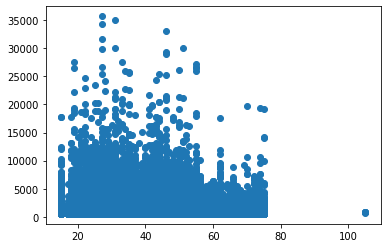

In [26]:
plt.scatter(tpd_merge.Age,tpd_merge.Purchase)

In [27]:
#tpd_merge.drop('Age',axis=1,inplace=True)

In [28]:
tpd_merge

,User_ID,Week_Number,Product_Category,Product_count,Purchase,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
0,1000001,30,4,2,1575,F,15.0,10,A,2,0
1,1000001,30,7,3,2361,F,15.0,10,A,2,0
2,1000001,35,7,2,1803,F,15.0,10,A,2,0
3,1000001,39,3,3,2450,F,15.0,10,A,2,0
4,1000001,39,7,2,1790,F,15.0,10,A,2,0
...,...,...,...,...,...,...,...,...,...,...,...
136892,1007092,49,11,1,2500,M,45.0,8,C,4+,1
136893,1007095,28,11,1,1750,M,41.0,8,C,4+,1
136894,1007099,10,10,1,593,F,47.0,8,C,4+,1
136895,1007099,14,4,1,704,F,47.0,8,C,4+,1


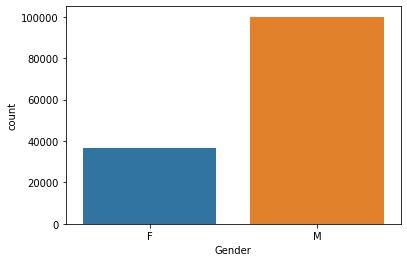

In [29]:
sns.countplot(tpd_merge.Gender)

In [30]:
#cols=['Occupation','Marital_Status']

In [31]:
for cols in ['Occupation','Marital_Status','Gender','City_Category','Stay_In_Current_City_Years']:
    tpd_merge[cols]=tpd_merge[cols].astype('category')

In [32]:
#tpd_merge.dtypes

In [33]:
x = tpd_merge.copy().drop("Purchase",axis=1)
y = pd.DataFrame(tpd_merge["Purchase"])

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=132)

In [35]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_train[cols]=x_train[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
x_train

,User_ID,Week_Number,Product_Category,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
79600,1003605,23,7,1,M,19.0,12,0,2,0
116765,1005151,36,2,1,M,18.0,19,2,1,0
3150,1000303,31,1,1,M,30.0,7,2,1,1
82463,1003713,27,12,1,F,27.0,7,1,1,1
16373,1000977,36,10,1,M,27.0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
23904,1001265,27,7,1,F,21.0,20,1,0,1
45233,1002106,6,4,4,F,20.0,20,0,3,1
104740,1004626,49,7,2,M,34.0,14,1,4,0
116524,1005138,32,1,1,M,35.0,17,1,0,0


In [37]:
x_train['Gender']=x_train['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
x_train

,User_ID,Week_Number,Product_Category,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
79600,1003605,23,7,1,1,19.0,12,0,2,0
116765,1005151,36,2,1,1,18.0,19,2,1,0
3150,1000303,31,1,1,1,30.0,7,2,1,1
82463,1003713,27,12,1,0,27.0,7,1,1,1
16373,1000977,36,10,1,1,27.0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
23904,1001265,27,7,1,0,21.0,20,1,0,1
45233,1002106,6,4,4,0,20.0,20,0,3,1
104740,1004626,49,7,2,1,34.0,14,1,4,0
116524,1005138,32,1,1,1,35.0,17,1,0,0


In [39]:
x_train.dtypes

User_ID                         int64
Week_Number                     int64
Product_Category                int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [40]:
for cols in ['Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']:
    x_test[cols]=x_test[cols].cat.codes


C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
x_test['Gender']=x_test['Gender'].cat.codes

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
x_test.dtypes

User_ID                         int64
Week_Number                     int64
Product_Category                int64
Product_count                   int64
Gender                           int8
Age                           float64
Occupation                       int8
City_Category                    int8
Stay_In_Current_City_Years       int8
Marital_Status                   int8
dtype: object

In [43]:
sc=StandardScaler()
cols_to_norm = ['Age','Product_count']
x_train[cols_to_norm] = sc.fit_transform(x_train[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
x_train

,User_ID,Week_Number,Product_Category,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
79600,1003605,23,7,-0.479818,1,-1.336111,12,0,2,0
116765,1005151,36,2,-0.479818,1,-1.418570,19,2,1,0
3150,1000303,31,1,-0.479818,1,-0.429060,7,2,1,1
82463,1003713,27,12,-0.479818,0,-0.676438,7,1,1,1
16373,1000977,36,10,-0.479818,1,-0.676438,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...
23904,1001265,27,7,-0.479818,0,-1.171193,20,1,0,1
45233,1002106,6,4,1.100426,0,-1.253652,20,0,3,1
104740,1004626,49,7,0.046930,1,-0.099224,14,1,4,0
116524,1005138,32,1,-0.479818,1,-0.016764,17,1,0,0


In [45]:
x_test[cols_to_norm] = sc.transform(x_test[cols_to_norm])

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
x_test

,User_ID,Week_Number,Product_Category,Product_count,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status
115238,1005087,28,7,-0.479818,0,-0.511519,6,1,1,1
45741,1002124,29,1,-0.479818,1,-0.429060,0,1,1,1
127334,1005623,32,4,1.100426,1,-0.676438,11,1,2,1
74088,1003400,28,7,0.573678,1,-0.181683,14,2,4,1
41393,1001961,23,7,-0.479818,0,1.302582,3,2,2,1
...,...,...,...,...,...,...,...,...,...,...
36953,1001781,33,2,-0.479818,0,0.395532,0,2,2,0
43701,1002050,29,7,1.627174,0,0.807827,3,2,2,0
47338,1002185,32,7,0.046930,1,1.137664,17,2,2,1
135213,1005964,37,4,2.153922,1,-1.336111,5,1,1,0


# lm 

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [49]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
train_pred=lm.predict(x_train)

In [51]:
test_pred=lm.predict(x_test)

In [52]:
print("coefficients:",lm.coef_)
print("coefficients",lm.intercept_)

coefficients: [[-1.91586594e-03  2.27585458e-01  6.73463055e+00  1.35568701e+03
  -2.00511613e+00  8.30968784e+00 -1.76193361e-01  2.13800578e+00
   4.03957733e-01 -1.40464658e-01]]
coefficients [3294.92093514]


In [53]:
rmse_train=sqrt(mean_squared_error(y_train,train_pred))
rmse_test=sqrt(mean_squared_error(y_test,test_pred))

In [54]:
rmse_train,rmse_test

(246.03377776026593, 245.7671397902529)

In [55]:
mse_train=mean_squared_error(y_train,train_pred)
mse_test=mean_squared_error(y_test,test_pred)

In [56]:
mse_train,mse_test

(60532.61979898793, 60401.48700068172)

In [57]:
mape_train=np.mean(np.abs((y_train-train_pred)/y_train))*100

In [58]:
mape_test=np.mean(np.abs((y_test-test_pred)/y_test))*100

In [59]:
mape_train

Purchase    14.415089
dtype: float64

In [60]:
mape_test

Purchase    14.487765
dtype: float64

In [61]:
print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=test_pred, y_true=y_test)))

print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=train_pred, y_true=y_train)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))

print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

The R2 value on test dataset: 0.9670898107619964 

The R2 value on train dataset: 0.968128640143482 

The Mean Squared Error on train dataset: 60532.61979898793 

The Mean Squared Error on test dataset: 60401.48700068172 



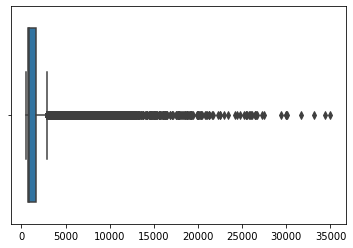

In [62]:
sns.boxplot(y_train)

In [63]:
results = sm.OLS(y_train,x_train).fit()

In [64]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Purchase   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          6.933e+05
Date:                Wed, 05 Feb 2020   Prob (F-statistic):                        0.00
Time:                        12:06:02   Log-Likelihood:                     -7.5764e+05
No. Observations:              109412   AIC:                                  1.515e+06
Df Residuals:                  109402   BIC:                                  1.515e+06
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
User_ID                        0.0014   3.25e-06    421.307      0.000       0.001       0.001
Week_Number                    0.2407      0.060      4.026      0.000       0.123       0.358
Product_Category               6.7448      0.298     22.625      0.000       6.160       7.329
Product_count               1356.1591      0.756   1793.839      0.000    1354.677    1357.641
Gender                        -1.5802      1.697     -0.931      0.352      -4.907       1.746
Age                            8.2298      0.788     10.439      0.000       6.685       9.775
Occupation                    -0.1510      0.116     -1.297      0.195      -0.379       0.077
City_Category                  2.1838      0.992      2.201      0.028       0.239       4.129
Stay_In_Current_City_Years     0.5414      0.581      0.932      0.352      -0.598       1.681
Marital_Status                -0.2516      1.585     -0.159      0.874      -3.359       2.855
==============================================================================
Omnibus:                    37329.804   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3013660.071
Skew:                           0.741   Prob(JB):                         0.00
Kurtosis:                      28.668   Cond. No.                     2.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
vif=pd.DataFrame()
vif['VIF Factor']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['features']=x_train.columns

In [66]:
vif.round(1)

,VIF Factor,features
0,19.2,User_ID
1,6.0,Week_Number
2,5.2,Product_Category
3,1.0,Product_count
4,3.8,Gender
5,1.1,Age
6,2.6,Occupation
7,3.4,City_Category
8,3.1,Stay_In_Current_City_Years
9,1.9,Marital_Status
